# BITS F312 - Neural Network and Fuzzy Logic



In [ ]:
# importing libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# connecting gdrive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# finding out current working directory
!pwd

/content/drive/MyDrive/NNFL/Data_A1


In [ ]:
# changing directory to - 'drive/MyDrive/NNFL/Data_A1/'
%cd drive/MyDrive/NNFL/Data_A1/

/content/drive/MyDrive/NNFL/Data_A1


In [ ]:
# defining plotting style
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 14)

In [ ]:
def metrics(Y_true, Y_pred):
    FP=0 # For counting the False Positives
    FN=0 # For counting the False Negatives
    TN=0 # For counting the True Negatives
    TP=0 # For counting the True Positives

    for i in range(len(Y_true)):
      if Y_true[i]==1:
        if Y_pred[i]==1:
          TP+=1
        else:
          FN+=1
      else:
        if Y_pred[i]==0:
          TN+=1
        else:
          FP+=1

    print('--------------------------------------------------------------------------------')
  
    print("False Positives : ", FP)
    print("False Negatives : ", FN)
    print("True Negatives  : ", TN)
    print("True Positives  : ", TP)

    print('--------------------------------------------------------------------------------')

    sens= TP/(TP+FN)
    spes = TN/(TN+FP)

    print("Sensitivity : ", sens)
    print("Specificity : ", spes)
    print("Accuracy ((TN+TP)/(TN+TP+FN+FP)) : ", ((TP+TN)/(TN+FN+TP+FP)))
    print('--------------------------------------------------------------------------------')



In [ ]:
def normalize(data):
  normalized_vec = data

  if(len(data.shape) == 1):
    mean = np.mean(data[:])
    std_dev = np.std(data[:])
    normalized_vec[:] = (normalized_vec[:] - mean)/std_dev
  else:
    for i in range(1,data.shape[1]):
      mean = np.mean(data[:, i])
      std_dev = np.std(data[:, i])
      normalized_vec[:,i] = (normalized_vec[:,i] - mean)/std_dev
  
  return normalized_vec

#Q11
Implement the K-means clustering-based unsupervised learning algorithm for the
dataset (“dataq11.xlsx”). Plot the estimated class labels vs individual features. Use the
number of clusters as K=20.

In [ ]:
def euclideanDistance(centroid, points):
  # function for calculating euclidean distance 
  val =  np.sqrt(np.sum((points-centroid)**2))
  return val

In [ ]:
def clustering(points, centroids , clusters_val = 20):
  # function for clustering 
  dist_list = []

  for i in range(clusters_val):
    dist_list.append(euclideanDistance(points, centroids[i]))

  return np.argmin(np.array(dist_list))

In [ ]:
def kmeans(X, epoch = 100, clusters_val = 20):
  # function for kmeans clustering

  # assigning random centroids
  idx = np.random.choice(len(X), clusters_val)
  centroids = X[idx]

  # declaring clusters
  clusters = np.zeros(len(X))

  # performing clustering
  for ep in range(epoch):
    #print('epoch: ', ep)
    for i in range(len(X)):
      clusters[i] = clustering(X[i], centroids)

    for i in range(clusters_val):
      points = [X[j] for j in range(len(X)) if clusters[j] == i]
      centroids[i] = np.mean(points, axis = 0)

  return centroids, clusters


In [ ]:
def kmeansClustering(filename):
  data = np.array(pd.read_excel(filename, header = None))
  centroids, clusters = kmeans(data)

  print('Printing out the Centroids')
  for i in range(len(centroids)):
    print('--------------------------')
    print(centroids[i])

  for cl in range(10):
    plt.figure()
    plt.scatter(np.arange(len(data)), data[:, cl], c = clusters.flatten(), s=25, cmap='plasma')
    plt.title('Feature {}'.format(cl))
  
  return centroids, clusters

Printing out the Centroids
--------------------------
[1.02103889e-02 2.08330556e-02 3.58491667e-03 1.24452778e+01
 2.44161111e+01 8.11197222e+01 4.71750000e+02 1.26131944e-01
 1.78098611e-01 1.65568694e-01 7.31091667e-02 2.76588889e-01
 7.96811111e-02]
--------------------------
[1.34598710e-02 2.06877097e-02 3.87761290e-03 1.75496774e+01
 2.74538710e+01 1.16825806e+02 9.42103226e+02 1.43090323e-01
 3.64234194e-01 4.20258065e-01 1.55376129e-01 3.24980645e-01
 9.42158065e-02]
--------------------------
[8.75573913e-03 2.11173913e-02 3.56808696e-03 1.37156522e+01
 2.37647826e+01 8.87773913e+01 5.71673913e+02 1.26398261e-01
 1.98793913e-01 1.67324739e-01 7.42426957e-02 2.89226087e-01
 8.30734783e-02]
--------------------------
[1.17868621e-02 1.95172414e-02 4.01858621e-03 1.57937931e+01
 2.57762069e+01 1.03692069e+02 7.61437931e+02 1.33512759e-01
 2.79361034e-01 2.75892414e-01 1.21766552e-01 2.93562069e-01
 8.57727586e-02]
--------------------------
[1.18653158e-02 2.52289474e-02 5.64347

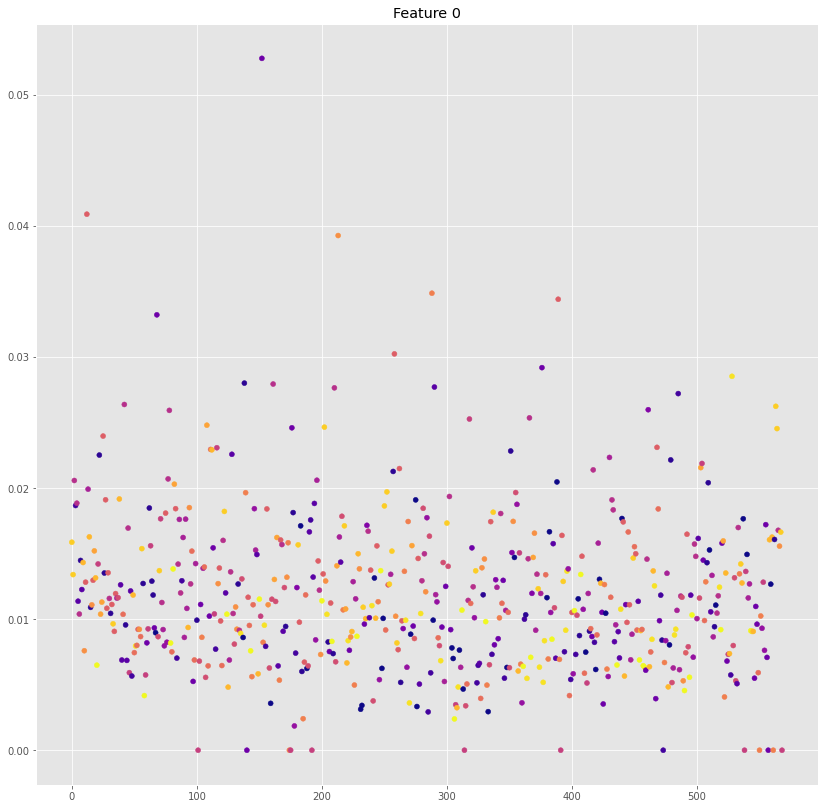

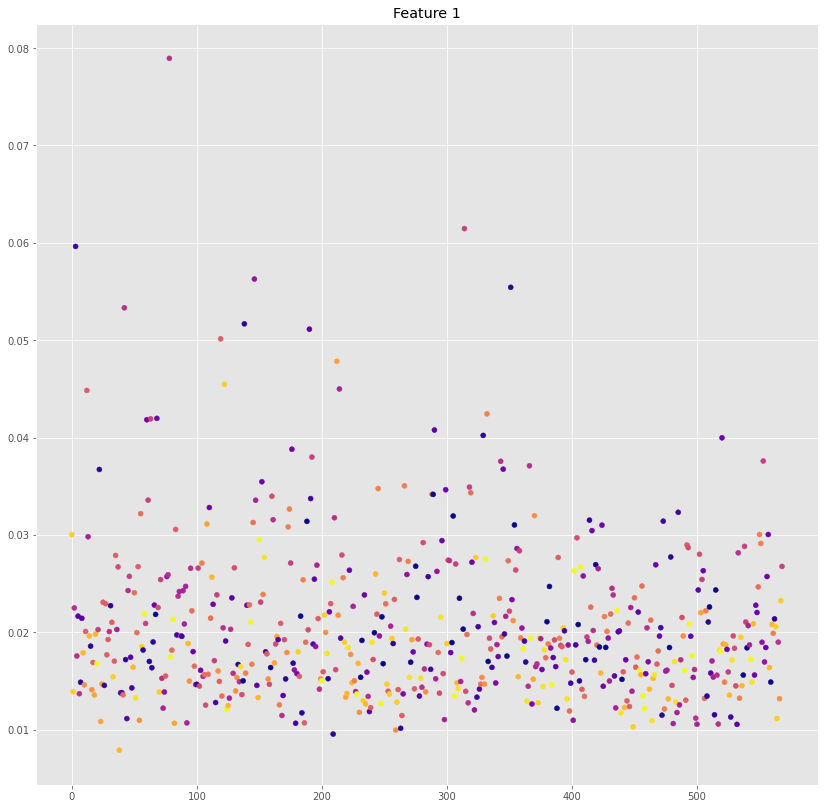

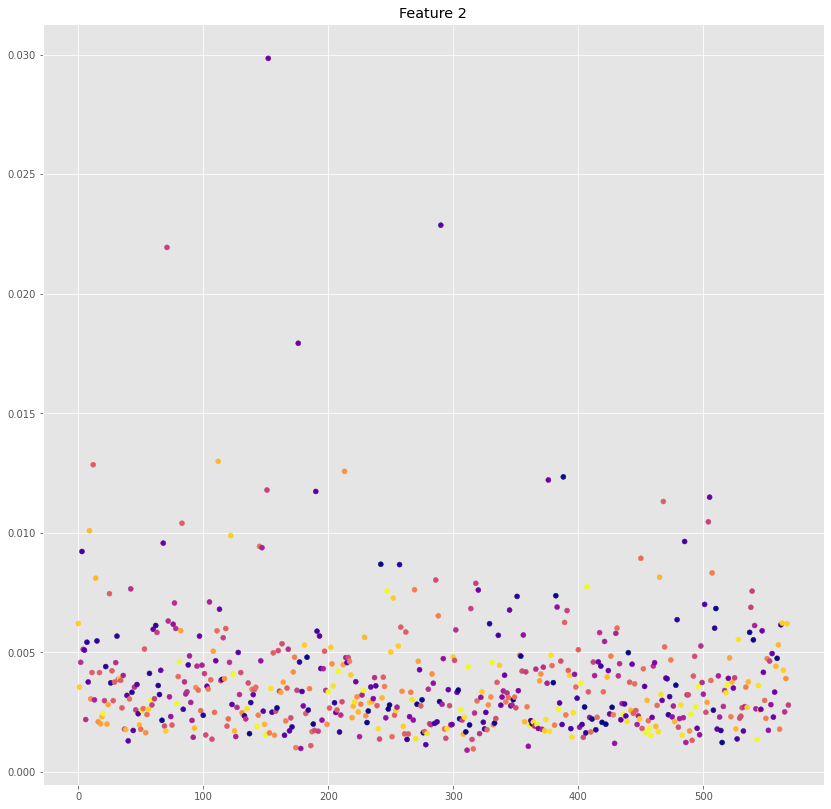

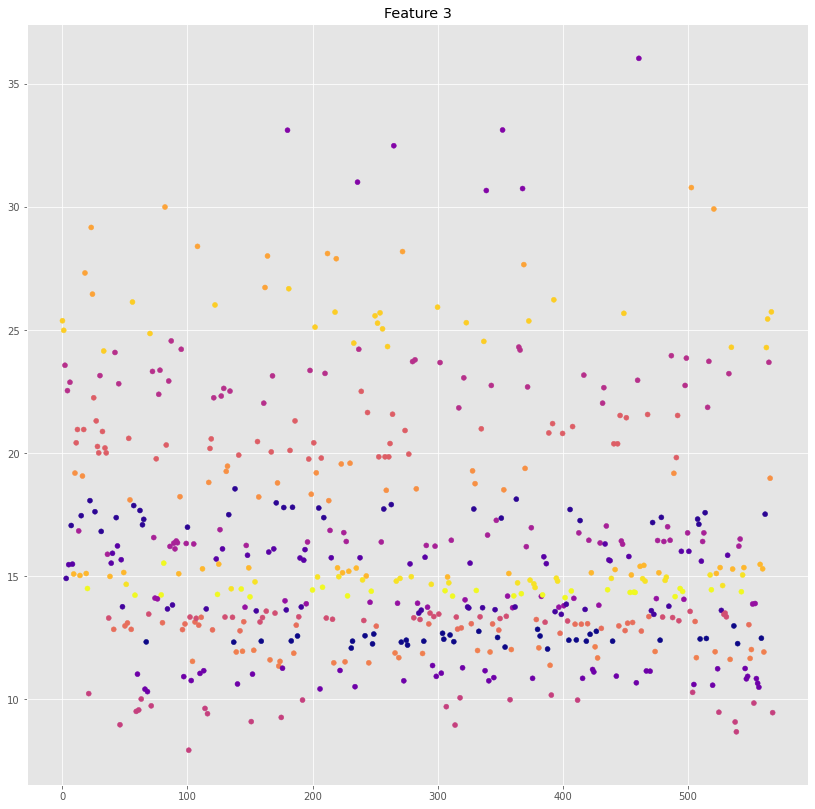

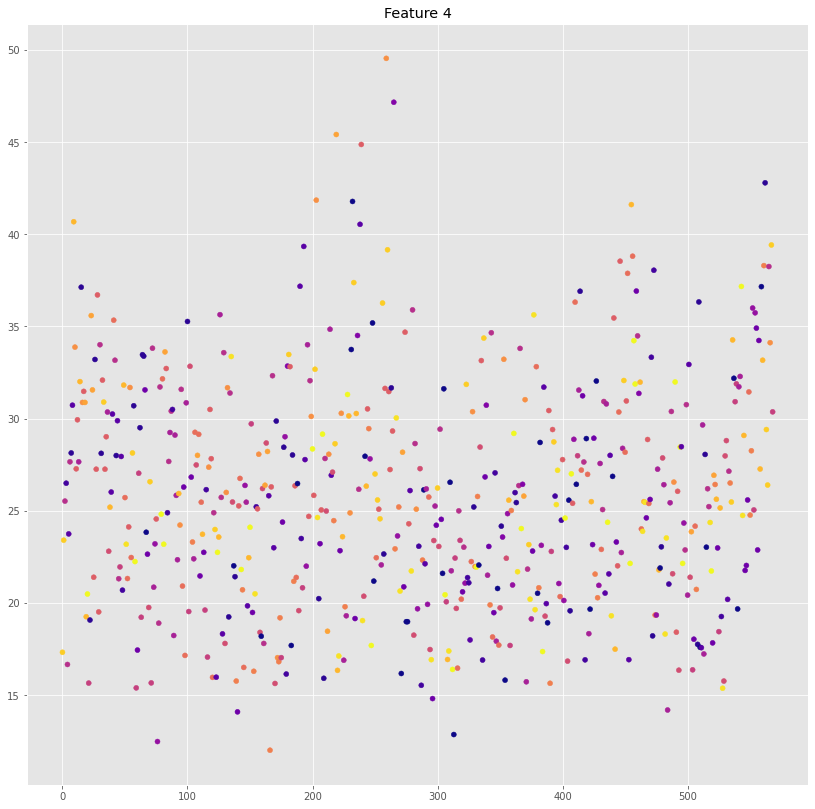

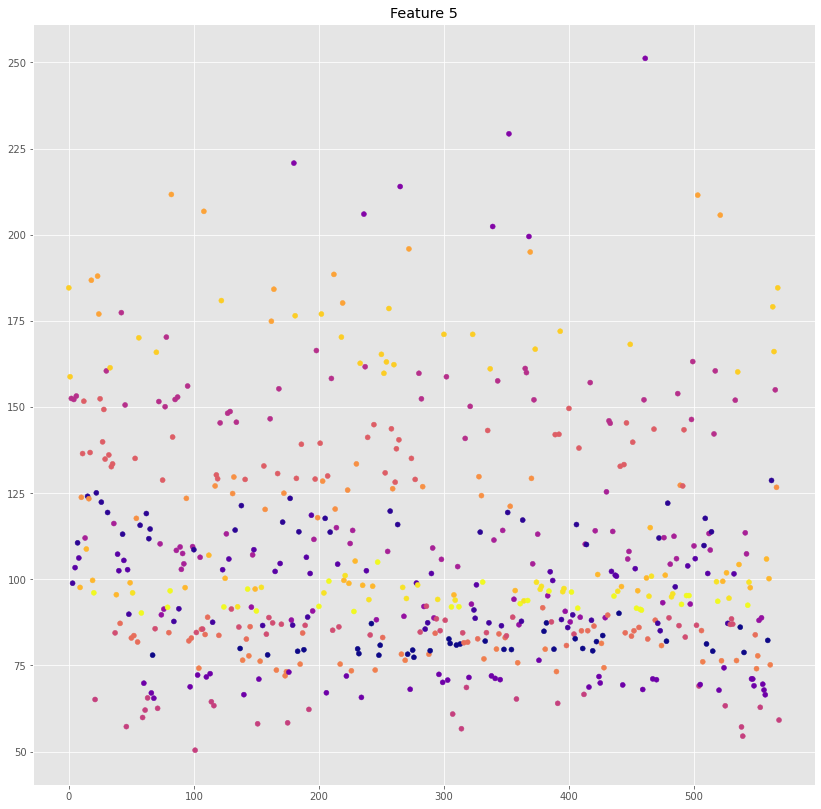

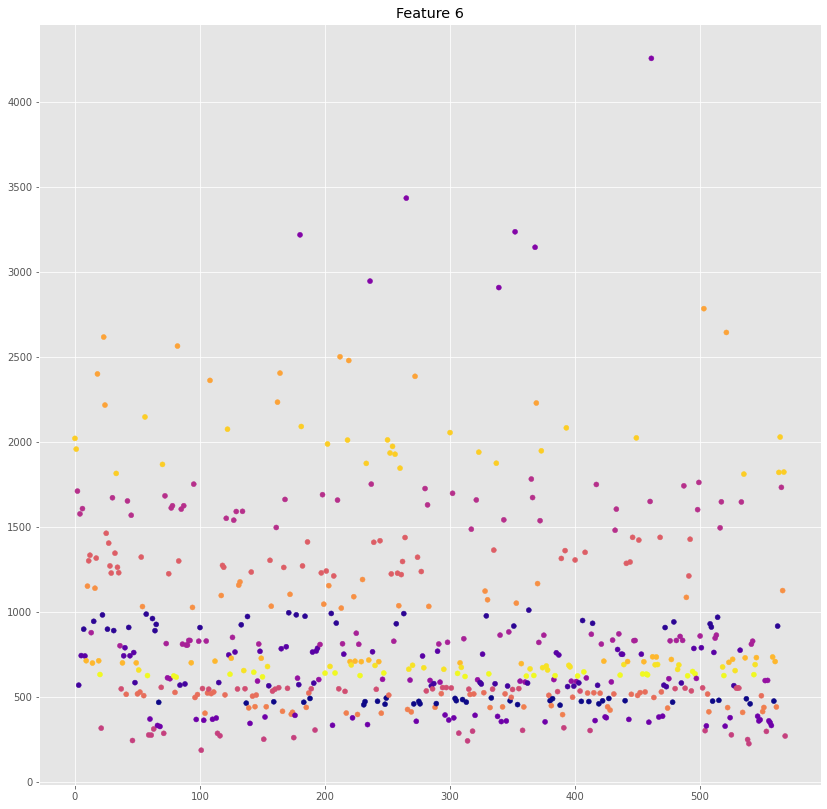

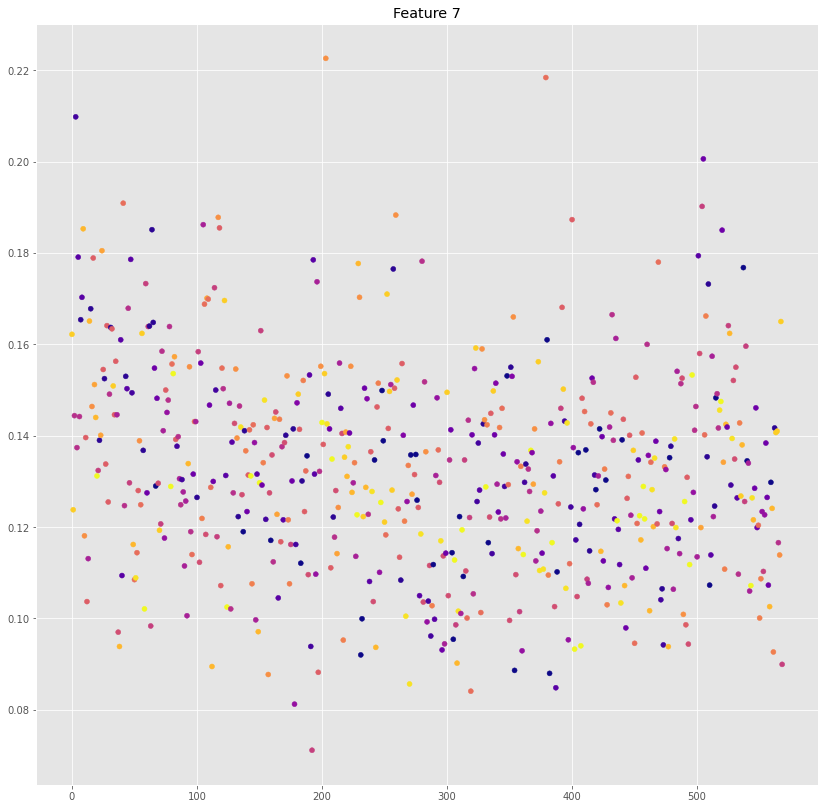

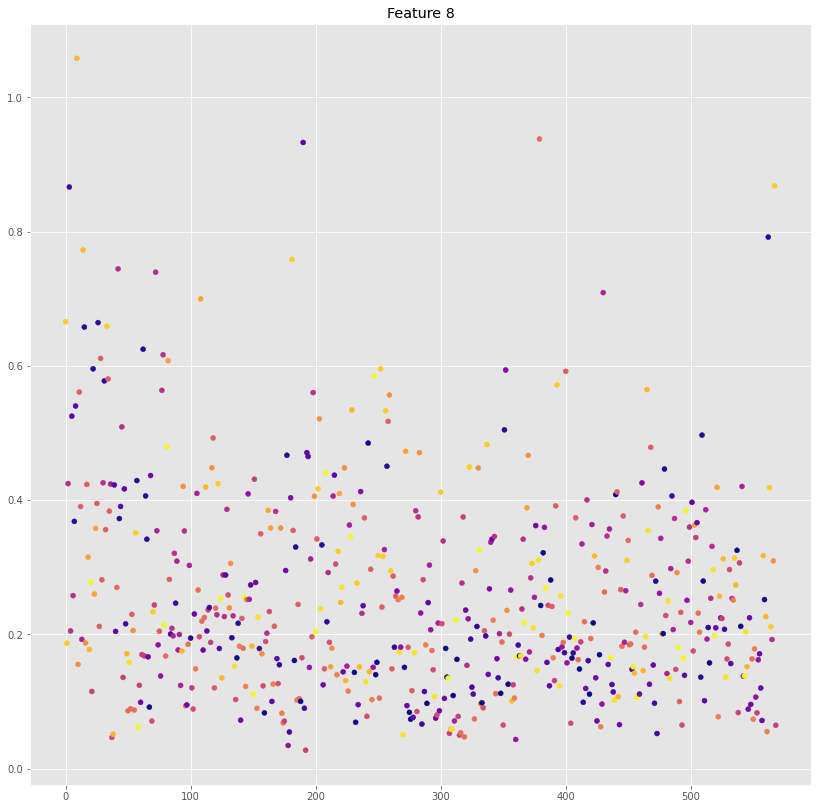

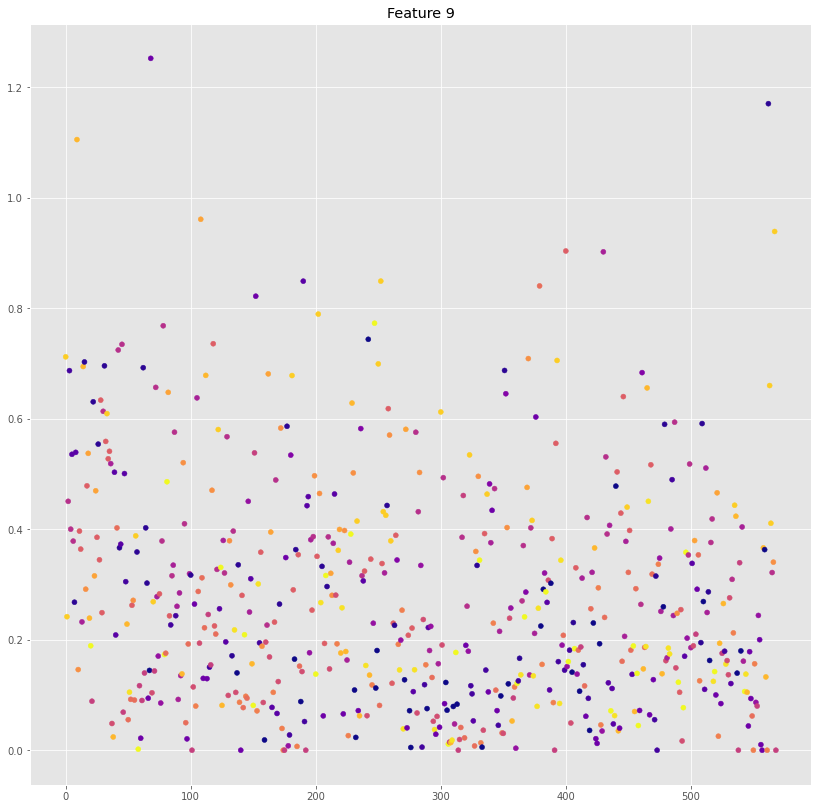

In [ ]:
centroids, clusters = kmeansClustering(filename='data_q11.xlsx')